In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
%matplotlib notebook

In [2]:
# Traget glass mould
v = 2.7 * 5.0 * 0.5 # Volume of mould [cm3]
rho = 5.228  # density [g/cm3]
print('Mass required: {}'.format(v * rho))

Mass required: 35.289


In [ ]:
# Fluence Calculation

def F(E0, w0):
    return (2*E0) / (np.pi * w0**2)

def E(F0, w0):
    return F0 * np.pi * w0**2 / 2

In [ ]:
w0 = 2.04E-4  # cm
E0 = 1E-6  # J

print('{:g}'.format(F(E0, w0)))

In [ ]:
print('{:g}'.format(E(100, w0)))

In [ ]:
# Optical Desnity
def T(OD):
    # Transmission in fraction
    return pow(10, -OD)

T(2) # more like 5% from spec sheet

# Gaussian Peak Fitting

<IPython.core.display.Javascript object>


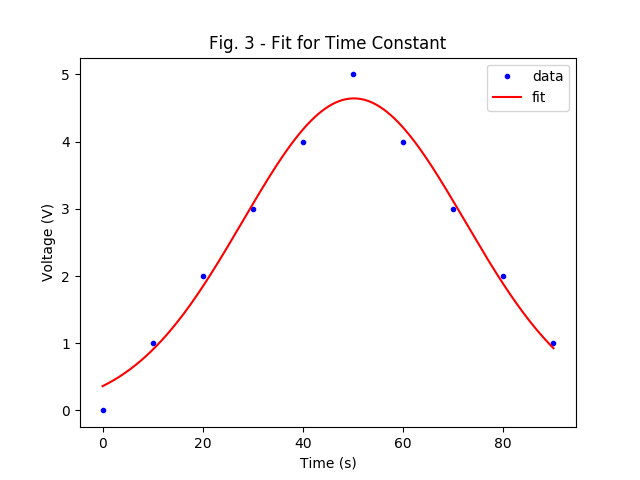

Fitted mean = 50.1618
Fitted standard deviation = 22.1852


In [98]:
# Define some test data which is close to Gaussian
x= np.linspace(0, 90, num=10)
y = np.array([0,1,2,3,4,5,4,3,2,1])

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
# https://stats.stackexchange.com/questions/60256/standard-deviation-of-binned-observations
n = len(x)                          # the number of data
A = max(y)
mu = sum(x*y)/sum(y)                # weighted mean (centre of curve) https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
sigma = np.sqrt(sum(y*(x-mu)**2)/(sum(y)-1))            # weighted standard deviation
p0 = [A, mu, sigma]

# Fit gaussian to data
popt, pcov = curve_fit(gauss, x, y, p0=p0)

# Plot results
fig, ax = plt.subplots()
ax.plot(x, y, 'b.', label='data')

xnew = np.linspace(min(x), max(x), num=1000)
ax.plot(xnew, gauss(xnew,*popt), 'r', label='fit')
plt.legend()
ax.set_title('Fig. 3 - Fit for Time Constant')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
plt.show()

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = {:g}'.format(popt[1]))
print('Fitted standard deviation = {:g}'.format(popt[2]))